# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [27]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [28]:

iris_data = load_iris()


In [37]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df_iris["target"] = iris_data.target
    df_iris["class"] = iris_data.target_names[iris_data.target]
    df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]
    return df_iris
    
df_iris = create_df()
df_iris.sample(n=10)


,sepal length,sepal width,petal length,petal width,target,class
146,6.3,2.5,5.0,1.9,2,virginica
71,6.1,2.8,4.0,1.3,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
6,4.6,3.4,1.4,0.3,0,setosa
73,6.1,2.8,4.7,1.2,1,versicolor
90,5.5,2.6,4.4,1.2,1,versicolor
103,6.3,2.9,5.6,1.8,2,virginica
40,5.0,3.5,1.3,0.3,0,setosa
15,5.7,4.4,1.5,0.4,0,setosa


In [30]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [31]:

#From our data we will only get variable columns as np.array

# YOUR CODE HERE
x = df_iris.iloc[:, 0:4]

In [32]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [33]:
# YOUR CODE HERE
mergings = linkage(x,method='complete') 


In [34]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

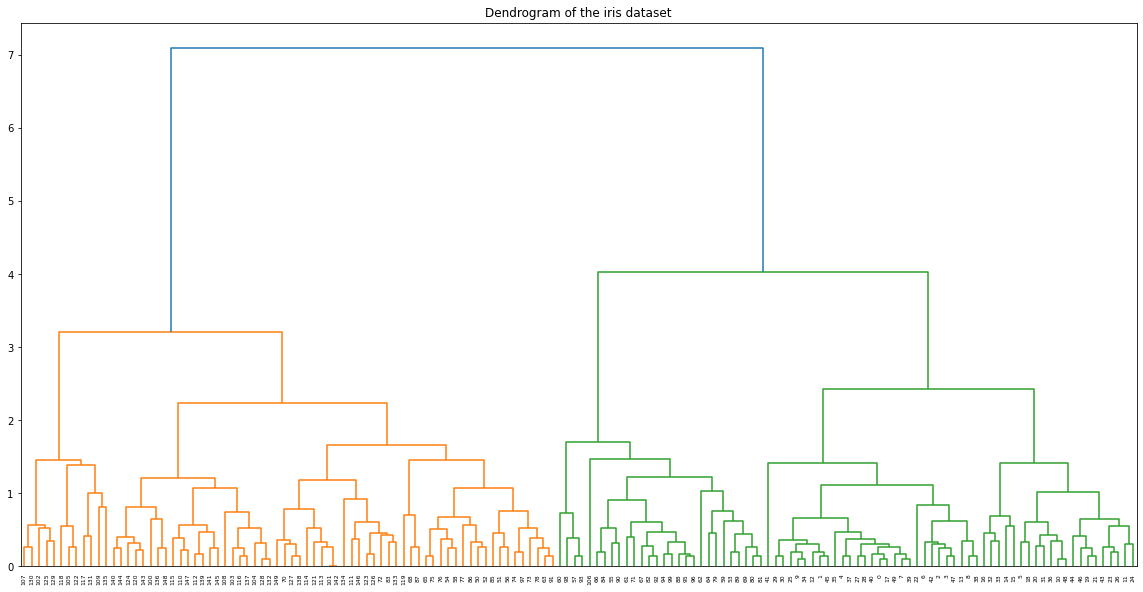

In [50]:

# YOUR CODE HERE
#varieties= df_iris['class']
plt.figure(figsize=(20,10))
dn = dendrogram(mergings,  leaf_rotation=90, leaf_font_size=6)
plt.title('Dendrogram of the iris dataset')
plt.show()


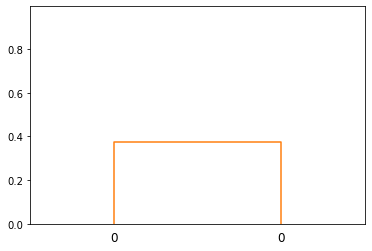

In [52]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [68]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values
df

,0,1
0,0.065446,-0.768664
1,-1.529015,-0.429531
2,1.709934,0.698853
3,1.167791,1.012626
4,-1.801101,-0.318613
...,...,...
295,0.356950,-1.150644
296,0.024822,-0.635948
297,-1.490756,-0.248251
298,-1.408588,0.256354


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [53]:
model = KMeans(n_clusters= 3)
# YOUR CODE HERE


In [54]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [55]:
# YOUR CODE HERE
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [58]:
# YOUR CODE HERE
labels= model.predict(points)
labels

array([1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2,
       0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0,
       2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2,
       2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1,
       2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [57]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [65]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points): 
    # YOUR CODE HERE
    
    
    data_0 = np.array([i for i in labels if i == 0])
    data_1 = np.array([i for i in labels if i == 1])
    data_2 = np.array([i for i in labels if i == 2])

   
    
    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(95,)
(111,)
(94,)


In [66]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

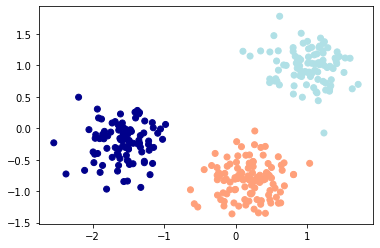

In [87]:
# plotting the data 

# YOUR CODE HERE
color= np.array(['darkblue', 'lightsalmon', 'powderblue'])
plt.subplot(1,1,1)
plt.scatter(x= df['0'].values, y= df['1'].values, c= color[labels])


**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [90]:

# YOUR CODE HERE
model = KMeans(n_clusters= 3)
model.fit(new_points)
new_labels= model.predict(new_points)

In [91]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [94]:
#separate the data by labels like we did before

new_0 = np.array([i for i in new_labels if i == 0])
new_1 = np.array([i for i in new_labels if i == 1])
new_2 = np.array([i for i in new_labels if i == 2])

# YOUR CODE HERE


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [93]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

Text(0.5, 1.0, 'New Labels')

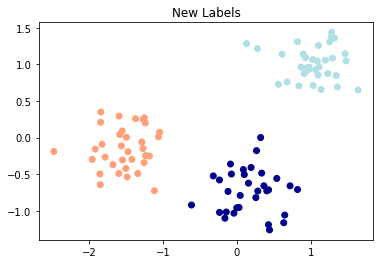

In [97]:
#plot the new labels
# YOUR CODE HERE

color= np.array(['darkblue', 'lightsalmon', 'powderblue'])
plt.subplot(1,1,1)
plt.scatter(x= new_df['0'].values, y= new_df['1'].values, c= color[new_labels])
plt.title("New Labels")

<ipython-input-99-93343f8939c2>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


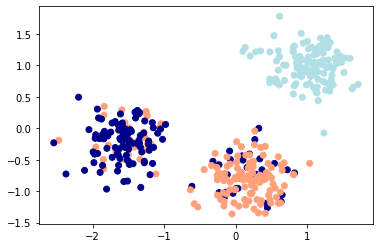

In [99]:
#plot all the points together

# YOUR CODE HERE
plt.subplot(1,1,1)
plt.scatter(x= new_df['0'].values, y= new_df['1'].values, c= color[new_labels])

plt.subplot(1,1,1)
plt.scatter(x= df['0'].values, y= df['1'].values, c= color[labels])
